### Rock or Mine
A classification model for predicting rock or mine based on sonar data from a submarin

In [41]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [42]:
labels = [f"a{i}" for i in range(60)] + ["target"]
df = pd.read_csv("dataset/sonar_data.csv", names=labels)
df.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a51,a52,a53,a54,a55,a56,a57,a58,a59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [43]:
df["target"] = (df["target"] == "R").astype(int)
df.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a51,a52,a53,a54,a55,a56,a57,a58,a59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


### Visualization

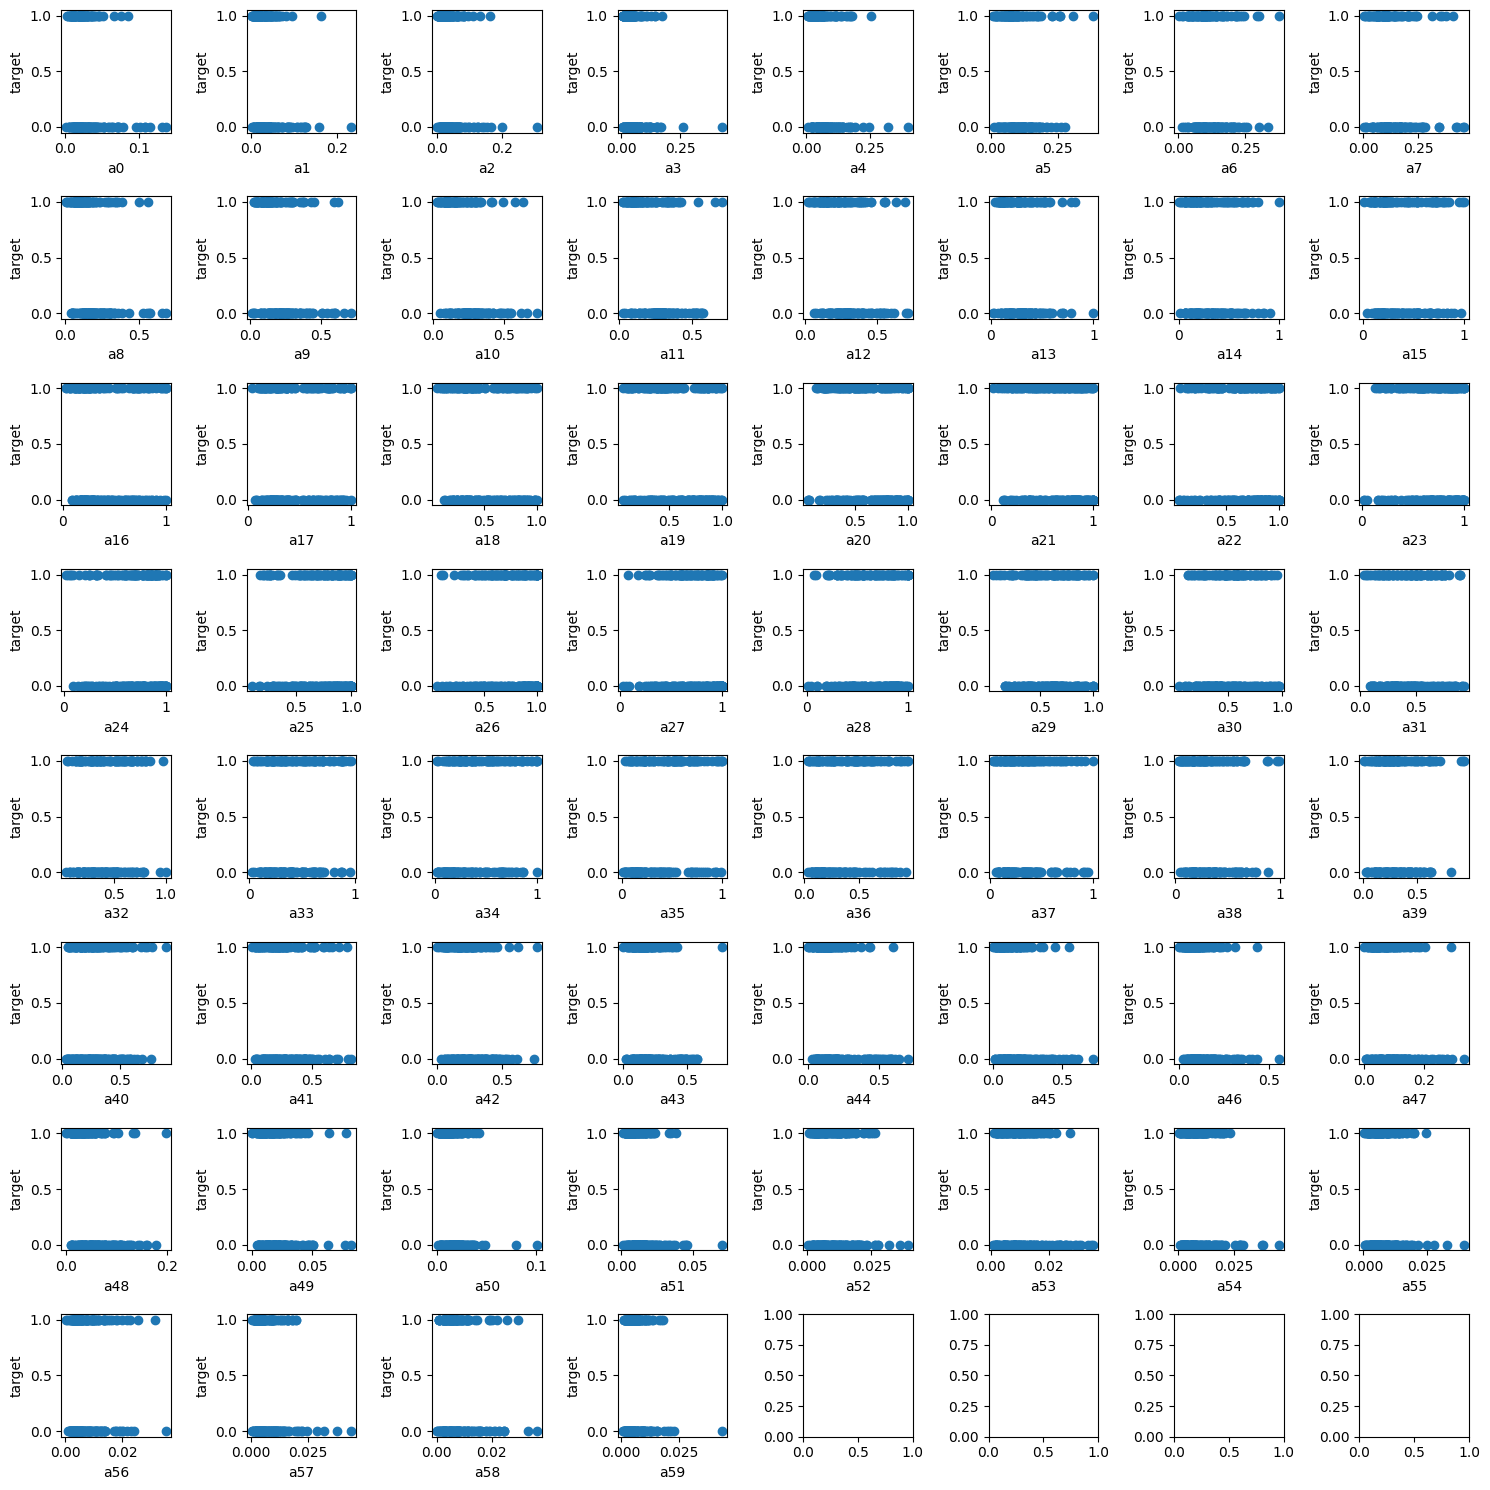

In [44]:
num_features = len(df.columns) - 1
num_rows = math.ceil(math.sqrt(num_features))
num_cols = math.ceil(num_features / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    axes[i].scatter(x=df[col], y=df[df.columns[-1]])
    axes[i].set_ylabel("target")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Split the data set to trainning validation and testing

In [45]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Scaling the data

In [46]:
def scaleDataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return X, y, data

In [47]:
x_train, y_train, train = scaleDataset(train)
x_valid, y_valid, valid = scaleDataset(valid)
x_test, y_test, test = scaleDataset(test)

### Logistic regression

In [48]:
LR_model = LogisticRegression()
LR_model = LR_model.fit(x_train, y_train)
y_predict = LR_model.predict(x_test)

### Logistic regression report

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.91      0.80      0.85        25

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



### K nearest neighbors

In [50]:
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(x_train, y_train)
y_predict = KNN_model.predict(x_test)

### K nearest neighbors report

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76        17
           1       0.94      0.64      0.76        25

    accuracy                           0.76        42
   macro avg       0.79      0.79      0.76        42
weighted avg       0.82      0.76      0.76        42



### Naive Bayse Model

In [52]:
NB_model = GaussianNB()
NB_model = NB_model.fit(x_train, y_train)
y_predict = NB_model.predict(x_test)

### Naive bayse report

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56        17
           1       0.70      0.56      0.62        25

    accuracy                           0.60        42
   macro avg       0.60      0.60      0.59        42
weighted avg       0.62      0.60      0.60        42



### Support vector mechine

In [54]:
SVM_model = SVC()
SVM_model = SVM_model.fit(x_train, y_train)
y_predict = SVM_model.predict(x_test)

### support vector mechine report

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.95      0.72      0.82        25

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.81        42
weighted avg       0.85      0.81      0.81        42



### Decision Tree

In [56]:
DT_model = DecisionTreeClassifier()
DT_model = DT_model.fit(x_train, y_train)
y_predict = DT_model.predict(x_test)

### Decision Tree Report

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.85      0.68      0.76        25

    accuracy                           0.74        42
   macro avg       0.74      0.75      0.74        42
weighted avg       0.76      0.74      0.74        42

